# Sentiment Analysis for Star Trek Discovery

In [21]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.action_chains import ActionChains
import time

def get_imdb_reviews_with_dates(tv_show_id):
    base_url = f"https://www.imdb.com/title/{tv_show_id}/reviews/"

    all_reviews_with_dates = []

    # Start a Chrome browser
    chrome_service = ChromeService('/Users/ZainHussain/Downloads/chromedriver-mac-x64/chromedriver')
    driver = webdriver.Chrome(service=chrome_service)

    try:
        driver.get(base_url)

        # Load more reviews until there are no more
        while True:
            try:
                load_more_button = driver.find_element(By.CLASS_NAME, 'load-more-data')
                load_more_button.click()
                time.sleep(2)  # Wait for the content to load (adjust as needed)
            except:
                break

        # Extract all review texts and dates
        reviews = driver.find_elements(By.CLASS_NAME, 'text.show-more__control')
        dates = driver.find_elements(By.CLASS_NAME, 'review-date')
        
        review_texts_with_dates = [(review.text, date.text) for review, date in zip(reviews, dates)]
        all_reviews_with_dates.extend(review_texts_with_dates)

    finally:
        driver.quit()

    return all_reviews_with_dates

# Example: Get reviews with dates for the TV show "Star Trek Discovery"
tv_show_id = "tt5171438"
reviews_with_dates = get_imdb_reviews_with_dates(tv_show_id)

# Print the first few reviews with dates
for i, (review, date) in enumerate(reviews_with_dates[:5], start=1):
    print(f"Review {i} ({date}): {review}")


Review 1 (9 February 2022): The first two seasons were awesome. Very good writing. Now with the third and especially the fourth season, the writing is horrible. Everything is overly dramatic. Pretty much every cast member annoys me now. I'm guessing the show got new writers after the second season. If that's the case, then they should have end the show there. Where did all the creativity go???
Review 2 (15 January 2022): 
Review 3 (11 March 2022): Never have been so bored to death of hearing stupid speeches. Every 10 minutes there's a big speech about what there going in to and how important it is. Yeah yeah we got after 50th speech we didn't need another 100. Make a sci-fi program not political bull crap.
Review 4 (27 December 2017): Ten years before Captain Kirk, this happened.....

I am not too big on two word reviews but I am tempted to make such a review here - this stinks!

Nearly everything about Star Trek: Discovery turns me off!

I view the original 60s series Star Trek as one

In [22]:
import pandas as pd
reviews_df = pd.DataFrame(reviews_with_dates)
reviews_df.head(5)

,0,1
0,The first two seasons were awesome. Very good ...,9 February 2022
1,,15 January 2022
2,Never have been so bored to death of hearing s...,11 March 2022
3,"Ten years before Captain Kirk, this happened.....",27 December 2017
4,,25 September 2017


In [23]:
reviews_df.dtypes

0    object
1    object
dtype: object

## Using TextBlob

In [24]:
pip install pandas textblob


Note: you may need to restart the kernel to use updated packages.


In [25]:
from textblob import TextBlob

In [26]:
reviews_df['sentiment score'] = reviews_df[0].apply(lambda x: TextBlob(x).sentiment.polarity)

In [31]:
# Categorize sentiment
reviews_df['sentiment'] = reviews_df['sentiment score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


In [35]:
# Convert the date column to datetime format
reviews_df['date'] = pd.to_datetime(reviews_df[1])

# Group by date and calculate average sentiment score
daily_sentiment = reviews_df.groupby(reviews_df['date'].dt.date)['sentiment score'].mean()


In [36]:
daily_sentiment

date
2017-09-22   -0.050000
2017-09-23    0.055380
2017-09-24    0.084285
2017-09-25    0.067971
2017-09-26    0.057153
                ...   
2023-12-30    0.076768
2023-12-31    0.067813
2024-01-13    0.000000
2024-01-14    0.303356
2024-01-19    0.000000
Name: sentiment score, Length: 1348, dtype: float64

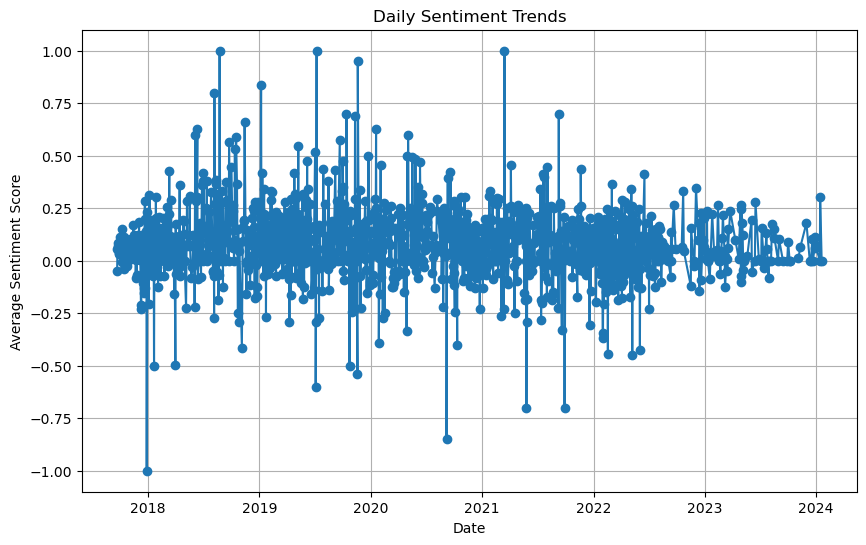

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(daily_sentiment.index, daily_sentiment.values, marker='o', linestyle='-')
plt.title('Daily Sentiment Trends')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

## Using NLTK and Vader

In [39]:
pip install pandas nltk


Note: you may need to restart the kernel to use updated packages.


In [1]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [41]:
reviews_df_nltk = pd.DataFrame(reviews_with_dates)

In [55]:
reviews_df_nltk = reviews_df_nltk[reviews_df_nltk[0].notna() & (reviews_df_nltk[0] != '') & (~reviews_df_nltk[0].str.isspace())]
reviews_df_nltk

,0,1
0,The first two seasons were awesome. Very good ...,9 February 2022
2,Never have been so bored to death of hearing s...,11 March 2022
3,"Ten years before Captain Kirk, this happened.....",27 December 2017
5,Stopped watching. Cannot tolerate actors who w...,29 January 2018
6,No one hates Star Trek more than Star Trek fan...,24 September 2017
...,...,...
4445,It was typical ST and I enjoyed it. The big pr...,24 September 2017
4446,There are positives and negatives to this seri...,26 October 2017
4447,Season 1 and 2 are pretty good.\n\nSeason 3 is...,15 January 2021
4448,"My Japanese style English is very bad, please ...",12 February 2019


In [56]:
reviews_df_nltk = reviews_df_nltk.reset_index(drop=True)
reviews_df_nltk

,0,1
0,The first two seasons were awesome. Very good ...,9 February 2022
1,Never have been so bored to death of hearing s...,11 March 2022
2,"Ten years before Captain Kirk, this happened.....",27 December 2017
3,Stopped watching. Cannot tolerate actors who w...,29 January 2018
4,No one hates Star Trek more than Star Trek fan...,24 September 2017
...,...,...
3726,It was typical ST and I enjoyed it. The big pr...,24 September 2017
3727,There are positives and negatives to this seri...,26 October 2017
3728,Season 1 and 2 are pretty good.\n\nSeason 3 is...,15 January 2021
3729,"My Japanese style English is very bad, please ...",12 February 2019


In [57]:
# Specify the file path where you want to save the CSV file
file_path = '/Users/ZainHussain/Downloads/star_trek_reviews.csv'

# Save the DataFrame to a CSV file
reviews_df_nltk.to_csv(file_path, index=False)  # Set index to False if you don't want to include row numbers in the output

print(f'DataFrame has been saved to {file_path}')

DataFrame has been saved to /Users/ZainHussain/Downloads/star_trek_reviews.csv


In [3]:
import pandas as pd
star_trek_df = pd.read_csv('star_trek_reviews.csv')
star_trek_df.head()

,0,1
0,The first two seasons were awesome. Very good ...,9 February 2022
1,Never have been so bored to death of hearing s...,11 March 2022
2,"Ten years before Captain Kirk, this happened.....",27 December 2017
3,Stopped watching. Cannot tolerate actors who w...,29 January 2018
4,No one hates Star Trek more than Star Trek fan...,24 September 2017


In [6]:
star_trek_df.columns = ['review', 'date']


In [7]:
import nltk

# Download the sentiment analysis tools from NLTK if not already done
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Assume you have a DataFrame with columns 'review_text' and 'date'
# Example:
# data = {'review_text': ["Great show, I love Star Trek!", "Not my favorite episode.", "An absolute masterpiece."], 'date': ["2023-10-01", "2023-10-02", "2023-10-03"]}
# df = pd.DataFrame(data)

# Analyze sentiment for each review
sentiment_scores = star_trek_df['review'].apply(sia.polarity_scores)

# Create new columns in the DataFrame for each sentiment score
star_trek_df['neg'] = sentiment_scores.apply(lambda x: x['neg'])
star_trek_df['neu'] = sentiment_scores.apply(lambda x: x['neu'])
star_trek_df['pos'] = sentiment_scores.apply(lambda x: x['pos'])
star_trek_df['compound'] = sentiment_scores.apply(lambda x: x['compound'])

# Print the updated DataFrame to show sentiment scores
star_trek_df.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ZainHussain/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,review,date,neg,neu,pos,compound
0,The first two seasons were awesome. Very good ...,9 February 2022,0.082,0.741,0.177,0.8091
1,Never have been so bored to death of hearing s...,11 March 2022,0.176,0.682,0.143,-0.6021
2,"Ten years before Captain Kirk, this happened.....",27 December 2017,0.052,0.760,0.188,0.9417
3,Stopped watching. Cannot tolerate actors who w...,29 January 2018,0.152,0.774,0.074,-0.7104
4,No one hates Star Trek more than Star Trek fan...,24 September 2017,0.052,0.860,0.088,0.8555


In [10]:
star_trek_df = star_trek_df.sort_values(by='date')
star_trek_df.head()

,review,date,neg,neu,pos,compound
2343,"Back to the drawing board, folks. THIS IS HORR...",1 April 2018,0.297,0.703,0.000,-0.9081
2142,"Not only is this bad Trek, it's just plain bad...",1 April 2018,0.369,0.572,0.059,-0.9988
3289,I watched everything Star Trek. I was truly sa...,1 April 2019,0.140,0.709,0.151,0.3440
3703,Simply awful. OMG. Not sure what this is. A so...,1 April 2019,0.221,0.779,0.000,-0.9172
3560,Micheal is ready to cry any time. What the hel...,1 April 2019,0.140,0.742,0.118,-0.7089


In [11]:
star_trek_df.describe()

,neg,neu,pos,compound
count,3731.000000,3731.000000,3731.000000,3731.000000
mean,0.105068,0.747187,0.147750,0.233726
std,0.082899,0.095021,0.092478,0.737252
min,0.000000,0.252000,0.000000,-0.998800
25%,0.047000,0.695000,0.088000,-0.548950
50%,0.092000,0.755000,0.136000,0.568600
75%,0.145000,0.807000,0.191500,0.918750
max,0.588000,1.000000,0.680000,0.999200


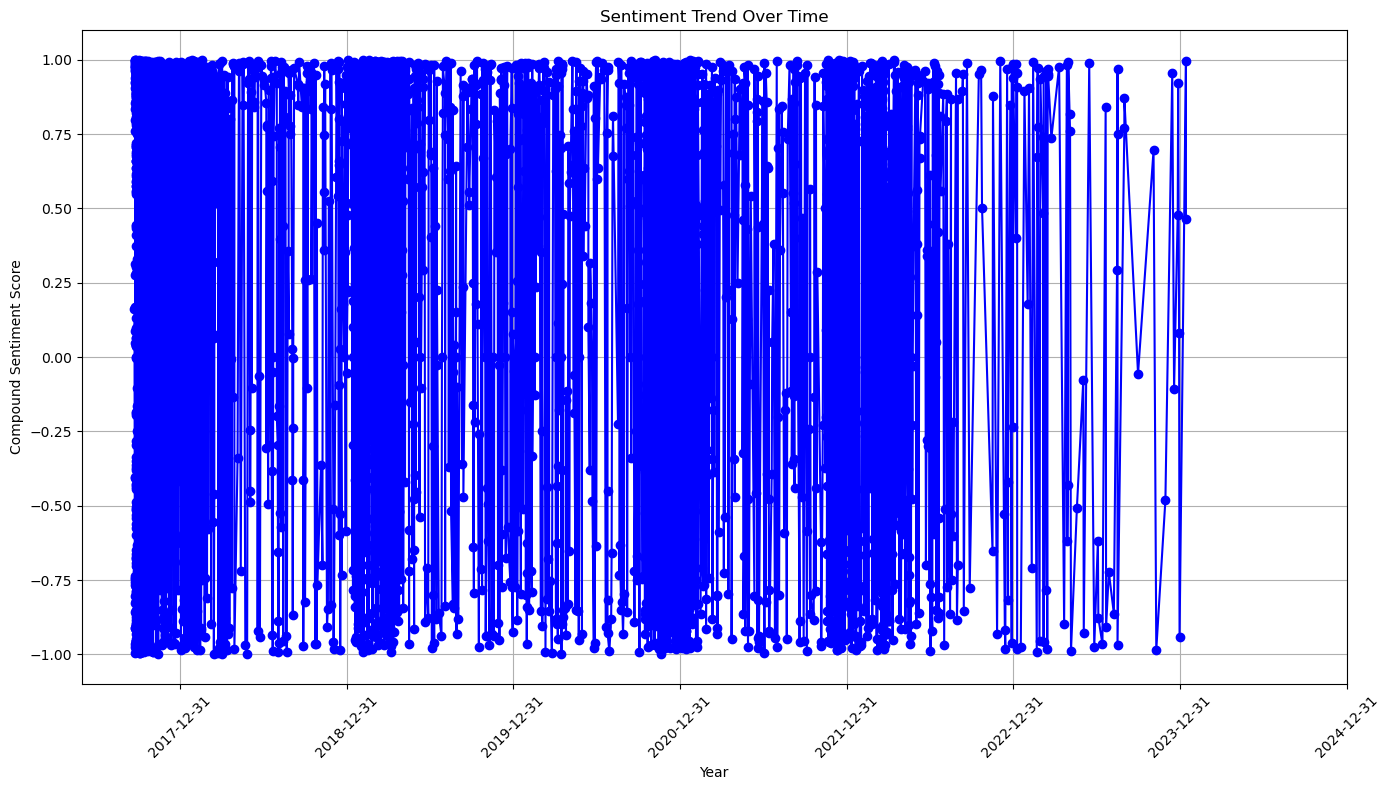

In [21]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df and has the 'date' and 'compound' columns
star_trek_df['date'] = pd.to_datetime(star_trek_df['date'])

# Sort the DataFrame by date to ensure proper plotting
star_trek_df = star_trek_df.sort_values(by='date')

# Plotting
plt.figure(figsize=(14, 8))  # Make the figure wider
plt.plot(star_trek_df['date'], star_trek_df['compound'], marker='o', linestyle='-', color='b')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Compound Sentiment Score')

# Format x-axis to show only the year
plt.xticks(star_trek_df['date'].dt.to_period('Y').unique(), rotation=45)

plt.grid(True)
plt.tight_layout()  # Adjust the padding to prevent overlap
plt.show()


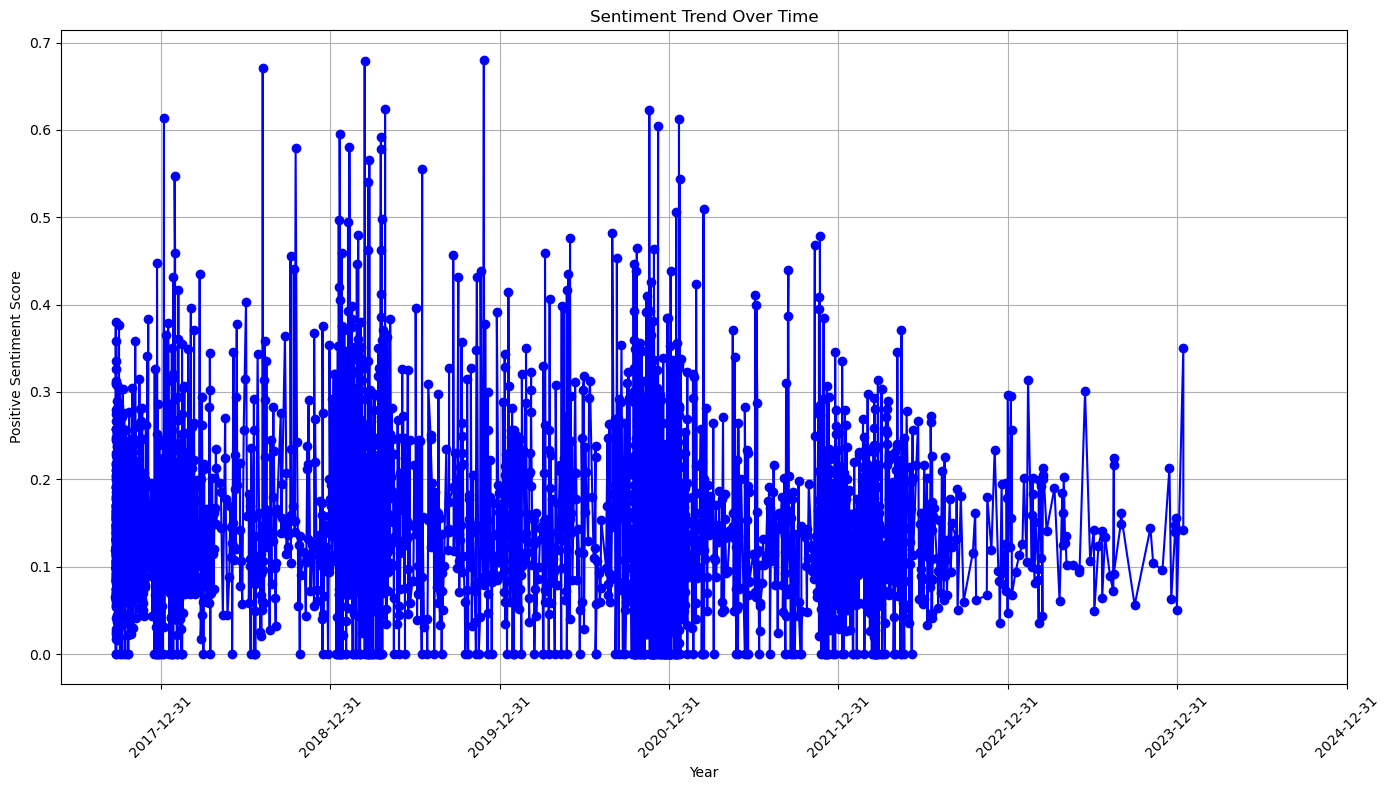

In [22]:
# Plotting
plt.figure(figsize=(14, 8))  # Make the figure wider
plt.plot(star_trek_df['date'], star_trek_df['pos'], marker='o', linestyle='-', color='b')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Positive Sentiment Score')

# Format x-axis to show only the year
plt.xticks(star_trek_df['date'].dt.to_period('Y').unique(), rotation=45)

plt.grid(True)
plt.tight_layout()  # Adjust the padding to prevent overlap
plt.show()


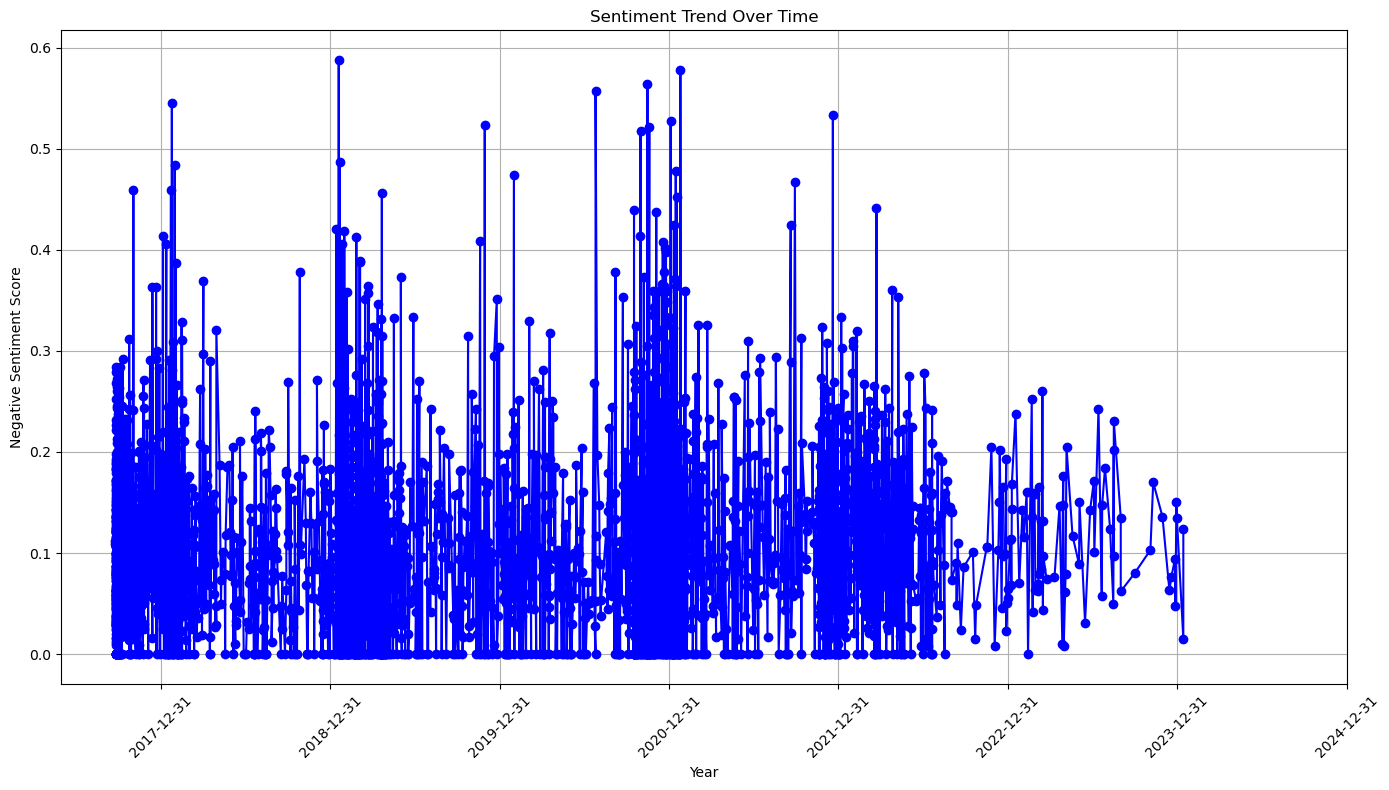

In [23]:
# Plotting
plt.figure(figsize=(14, 8))  # Make the figure wider
plt.plot(star_trek_df['date'], star_trek_df['neg'], marker='o', linestyle='-', color='b')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Negative Sentiment Score')

# Format x-axis to show only the year
plt.xticks(star_trek_df['date'].dt.to_period('Y').unique(), rotation=45)

plt.grid(True)
plt.tight_layout()  # Adjust the padding to prevent overlap
plt.show()


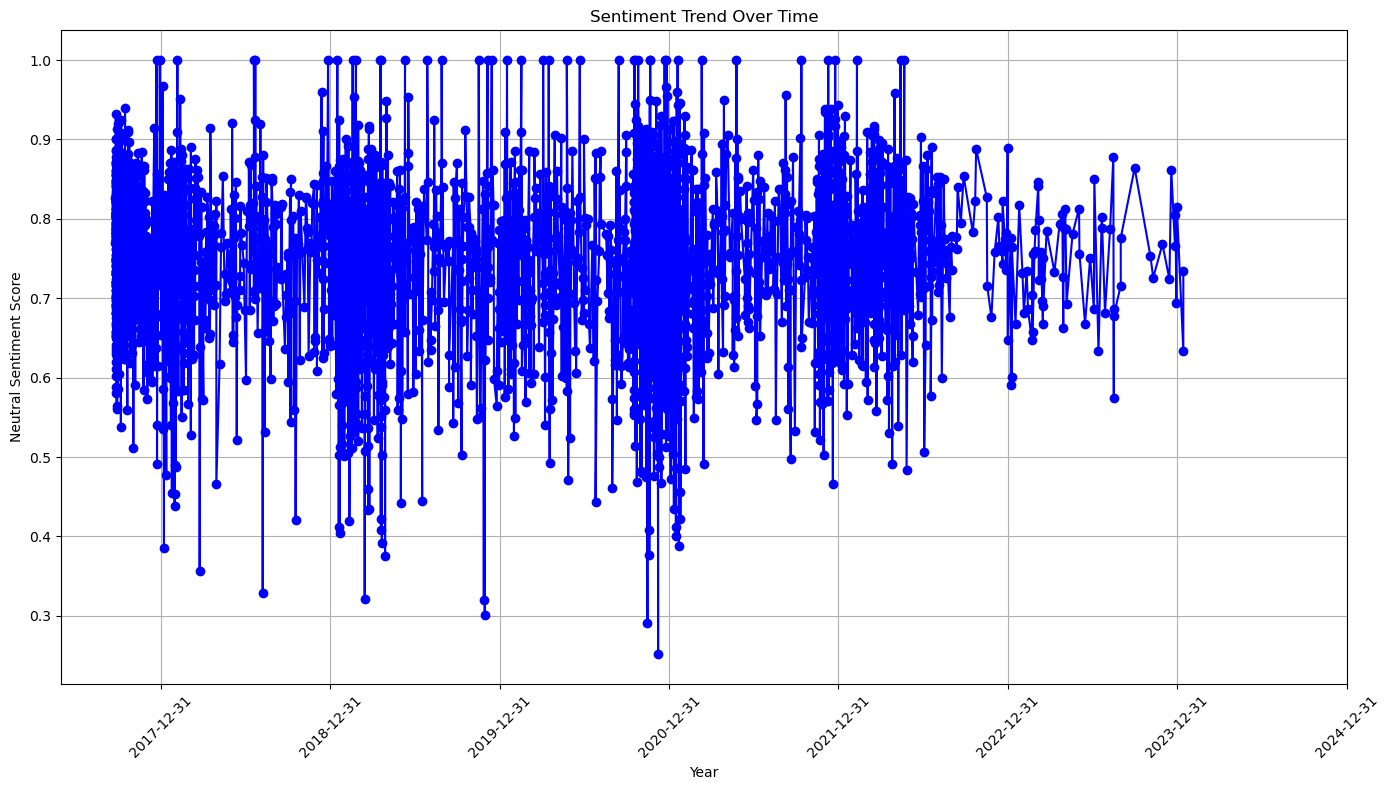

In [24]:
# Plotting
plt.figure(figsize=(14, 8))  # Make the figure wider
plt.plot(star_trek_df['date'], star_trek_df['neu'], marker='o', linestyle='-', color='b')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Neutral Sentiment Score')

# Format x-axis to show only the year
plt.xticks(star_trek_df['date'].dt.to_period('Y').unique(), rotation=45)

plt.grid(True)
plt.tight_layout()  # Adjust the padding to prevent overlap
plt.show()
